In [11]:
import cv2
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys

## code adapted from: https://stackoverflow.com/questions/48491217/removing-grid-from-an-image

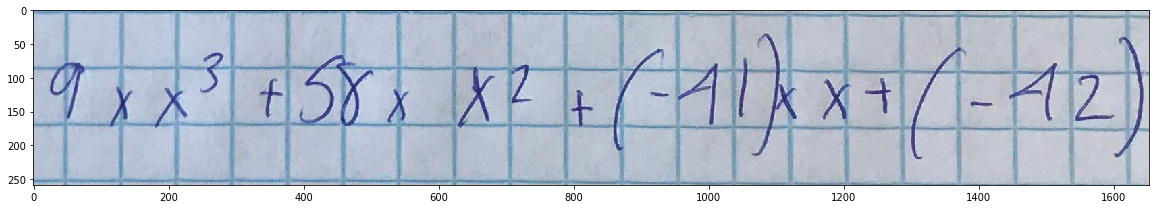

In [82]:
# read in and plot image
graph = mpimg.imread("graph_paper_ex.jpg")
plt.figure(figsize=(20,10))
plt.imshow(graph);

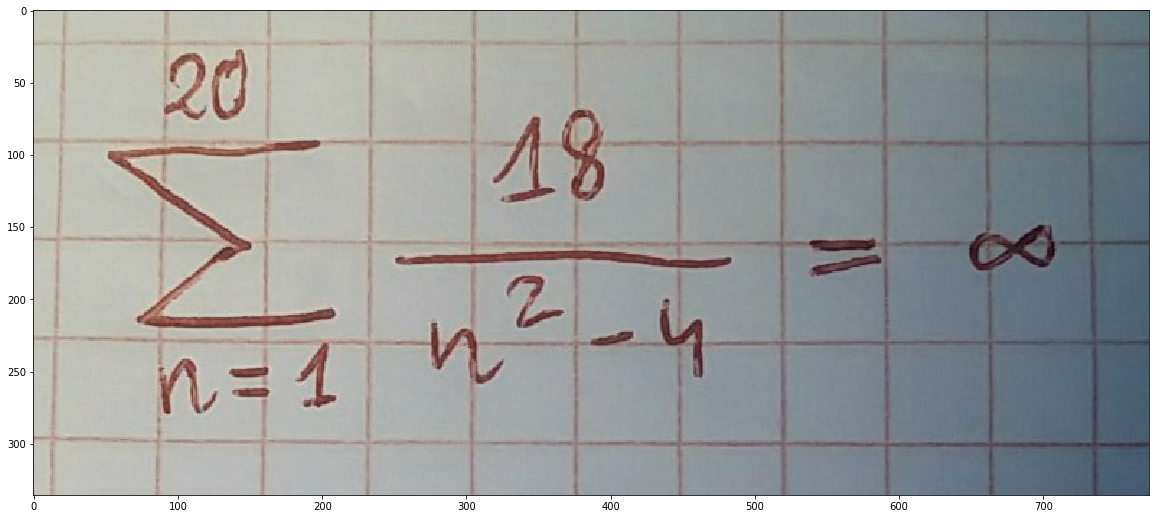

In [23]:
# read in and plot image
graph2 = mpimg.imread("sample1.png")
plt.figure(figsize=(20,10))
plt.imshow(graph2);

In [34]:
print("Our image shape is:", graph.shape)
print("Sample shape is:", graph2.shape)

Our image shape is: (259, 1653)
Sample shape is: (336, 774, 4)


In [70]:
BLOCK_SIZE = 10
THRESHOLD = 25

In [36]:
def preprocess(image):
    image = cv2.medianBlur(image, 3)
    image = cv2.GaussianBlur(image, (3, 3), 0)
    return 255 - image

In [37]:
def postprocess(image):
    image = cv2.medianBlur(image, 5)
    # image = cv2.medianBlur(image, 5)
    # kernel = numpy.ones((3,3), numpy.uint8)
    # image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return image

In [38]:
def get_block_index(image_shape, yx, block_size): 
    y = numpy.arange(max(0, yx[0]-block_size), min(image_shape[0], yx[0]+block_size))
    x = numpy.arange(max(0, yx[1]-block_size), min(image_shape[1], yx[1]+block_size))
    return numpy.meshgrid(y, x)

In [39]:
def adaptive_median_threshold(img_in):
    med = numpy.median(img_in)
    img_out = numpy.zeros_like(img_in)
    img_out[img_in - med < THRESHOLD] = 255
    return img_out

In [40]:
def block_image_process(image, block_size):
    out_image = numpy.zeros_like(image)
    for row in range(0, image.shape[0], block_size):
        for col in range(0, image.shape[1], block_size):
            idx = (row, col)
            block_idx = get_block_index(image.shape, idx, block_size)
            out_image[block_idx] = adaptive_median_threshold(image[block_idx])

    return out_image

In [54]:
def process_image_file(filename):
    image_in = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
    print(image_in.shape)
   
    image_in = preprocess(image_in)
    image_out = block_image_process(image_in, BLOCK_SIZE)
    image_out = postprocess(image_out)

    cv2.imwrite('bin_' + filename, image_out)

In [71]:
process_image_file("sample1.png")
process_image_file("graph_paper_ex.jpg")

(336, 774)


/Users/utoarca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


(259, 1653)


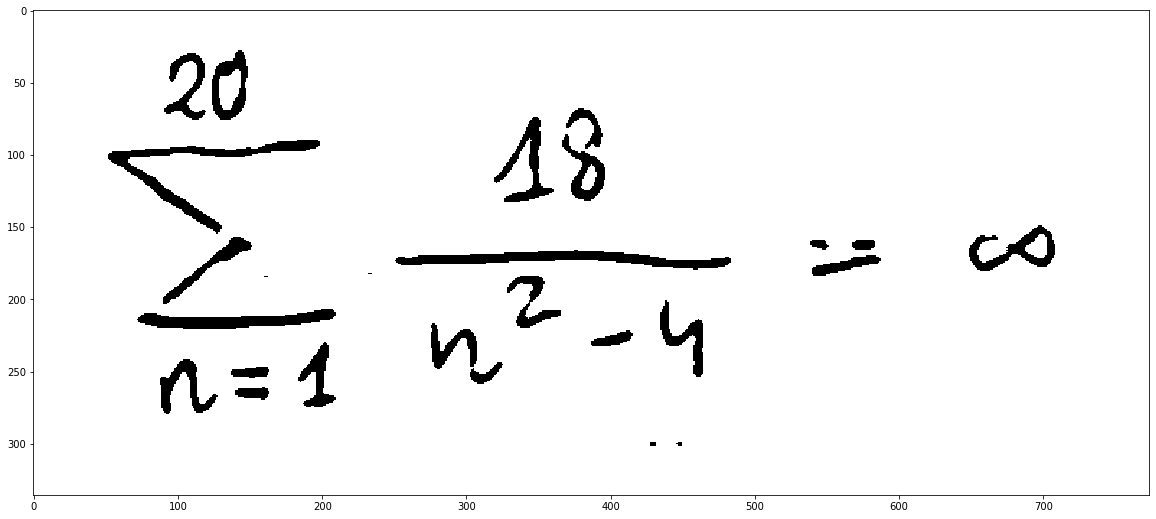

In [72]:
# read in and plot image
graph = mpimg.imread("bin_sample1.png")
plt.figure(figsize=(20,10))
plt.imshow(graph,cmap='Greys_r');

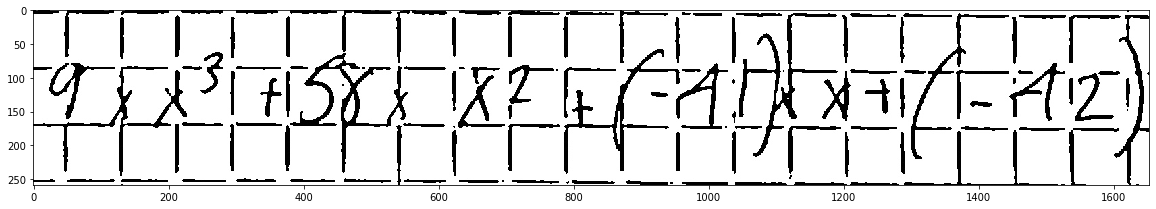

In [73]:
# read in and plot image
graph = mpimg.imread("bin_graph_paper_ex.jpg")
plt.figure(figsize=(20,10))
plt.imshow(graph,cmap='Greys_r');